# Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. Baca data CSV
df = pd.read_csv("scrapped_Tiktok_EN.csv")  # Ganti dengan path file aslimu


In [3]:
df = df.dropna(subset=["content"])  # Hapus baris dengan content kosong
reviews = df["content"].astype(str)  # Konversi ke string

In [4]:
df["at"] = pd.to_datetime(df["at"])  # Ubah ke format tanggal
df_filtered = df[df["at"].dt.year == 2024]

df_filtered.shape


(18996, 11)

In [5]:
df = df_filtered.sample(n=6000, random_state=42)  # Ambil 6000 data 
df.score.value_counts()

score
1    2196
5    1892
3     672
4     633
2     607
Name: count, dtype: int64

In [6]:
from typing import List
import re


import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download stopwords (hanya perlu sekali)
nltk.download("stopwords")

# Stopwords & stemmer untuk Bahasa Inggris
stop_words_en = set(stopwords.words("english"))
stemmer_en = PorterStemmer()

def tokenize(text: str):
    """Tokenisasi, stopword removal, dan stemming"""
    cleaned_text = re.sub(r"[^\w\s]", "", text)  # Hapus tanda baca
    tokens = cleaned_text.lower().split()  # Tokenisasi
    filtered_tokens = [stemmer_en.stem(word) for word in tokens if word not in stop_words_en]  # Stopwords & Stemming
    return filtered_tokens

# Terapkan ke dataframe
df["tokens"] = df["content"].apply(tokenize)
df[["content", "tokens"]].head()  # Cek hasil


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dirga\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,content,tokens
2360,Why can't I put caption on my repost?!?!!,"[cant, put, caption, repost]"
9545,Sometimes I can't open it please fix it,"[sometim, cant, open, pleas, fix]"
42,"I hate tiktok, When I want to create a new acc...","[hate, tiktok, want, creat, new, account, rand..."
3887,It has many bugs it's not worth it to install ...,"[mani, bug, worth, instal, hope, tiktok, fix]"
3710,Earning coins while watching,"[earn, coin, watch]"


In [ ]:
# df["tokens"] = df["content"].apply(tokenize)
# df[["content", "tokens"]].head()  # Cek hasil tokenisasi

,content,tokens
2360,Why can't I put caption on my repost?!?!!,"[why, cant, i, put, caption, on, my, repost]"
9545,Sometimes I can't open it please fix it,"[sometimes, i, cant, open, it, please, fix, it]"
42,"I hate tiktok, When I want to create a new acc...","[i, hate, tiktok, when, i, want, to, create, a..."
3887,It has many bugs it's not worth it to install ...,"[it, has, many, bugs, its, not, worth, it, to,..."
3710,Earning coins while watching,"[earning, coins, while, watching]"


In [7]:
total_corpus = set(word for tokens in df["tokens"] for word in tokens)

word_count_list = []
for tokens in df["tokens"]:
    word_count = dict.fromkeys(total_corpus, 0)
    for word in tokens:
        word_count[word] += 1
    word_count_list.append(word_count)


In [8]:
word_counts = []

# Iterasi setiap review dalam dataset
for tokens in df["tokens"]:
    word_count = dict.fromkeys(total_corpus, 0)  # Inisialisasi semua kata dengan 0
    for word in tokens:
        word_count[word] += 1  # Hitung kemunculan kata dalam review
    word_counts.append(word_count)

# Konversi ke DataFrame
freq_df = pd.DataFrame(word_counts)

# Menampilkan semua baris (opsional, bisa menyebabkan output panjang)
pd.set_option("display.max_rows", None)

# Tampilkan DataFrame Transpose agar lebih mudah dibaca
freq_df.T.head(5)


,0,1,2,3,4,5,6,7,8,9,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
leisur,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
orgin,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pn,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pleasee,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
implement,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
def compute_tf(tokens):
    word_counts = {word: 0 for word in tokens}  # Inisialisasi dictionary
    for word in tokens:
        word_counts[word] += 1  # Hitung jumlah kata

    total_words = len(tokens)  # Total kata dalam dokumen
    tf_dict = {word: count / total_words for word, count in word_counts.items()}  # Hitung TF
    return tf_dict


df["tf"] = df["tokens"].apply(compute_tf)  # Hitung TF untuk setiap review
df[["content", "tf"]]


,content,tf
2360,Why can't I put caption on my repost?!?!!,"{'cant': 0.25, 'put': 0.25, 'caption': 0.25, '..."
9545,Sometimes I can't open it please fix it,"{'sometim': 0.2, 'cant': 0.2, 'open': 0.2, 'pl..."
42,"I hate tiktok, When I want to create a new acc...","{'hate': 0.027777777777777776, 'tiktok': 0.027..."
3887,It has many bugs it's not worth it to install ...,"{'mani': 0.14285714285714285, 'bug': 0.1428571..."
3710,Earning coins while watching,"{'earn': 0.3333333333333333, 'coin': 0.3333333..."
10299,Reporting system is a joke. Someone said N WOR...,"{'report': 0.043478260869565216, 'system': 0.0..."
16275,Tiktok are you serious? I cant open Tiktok sin...,"{'tiktok': 0.14285714285714285, 'seriou': 0.07..."
7040,It's so nice it had a lot of dance lesson that...,"{'nice': 0.2, 'lot': 0.2, 'danc': 0.2, 'lesson..."
6834,"When I opened the app, it just got stuck or la...","{'open': 0.10526315789473684, 'app': 0.0526315..."
1747,MALAYSIA should banned this app,"{'malaysia': 0.3333333333333333, 'ban': 0.3333..."


In [10]:
# 5. Hitung Inverse Document Frequency (IDF)
def idf(word_counts):
    """Menghitung IDF berdasarkan jumlah dokumen yang mengandung kata tertentu"""
    N = len(word_counts)
    idf_dict = dict.fromkeys(word_counts[0].keys(), 0)

    for word in idf_dict.keys():
        idf_dict[word] = sum(1 for doc in word_counts if doc[word] > 0)

    for word, df in idf_dict.items():
        idf_dict[word] = np.log10((N + 1) / (df + 1))  # Rumus IDF

    return idf_dict

idfs = idf(word_count_list)

In [11]:
idfs

{'leisur': 3.477193631102115,
 'orgin': 3.477193631102115,
 'pn': 3.477193631102115,
 'pleasee': 3.176163635438134,
 'implement': 3.477193631102115,
 'look': 1.94571471405986,
 'inpir': 3.477193631102115,
 'comeback': 3.0792536224300777,
 'imran': 3.477193631102115,
 'unsuccess': 3.477193631102115,
 'dirti': 3.301102372046434,
 'broadcast': 2.8751336397741527,
 'varieti': 3.301102372046434,
 'readd': 3.477193631102115,
 'head': 3.477193631102115,
 'bring': 1.838704374147478,
 'messeg': 3.477193631102115,
 'naman': 2.7782236267660965,
 'seanshetiw': 3.477193631102115,
 'overview': 3.477193631102115,
 'wait': 2.259709686888209,
 'thu': 3.301102372046434,
 'tediou': 3.176163635438134,
 'jew': 3.477193631102115,
 'last': 2.0969823893905093,
 'zionlst': 3.477193631102115,
 'chace': 3.477193631102115,
 'kung': 3.301102372046434,
 'engen': 3.477193631102115,
 'saythank': 3.477193631102115,
 'threat': 3.0792536224300777,
 'rhyme': 3.477193631102115,
 'frequent': 2.9331255867518395,
 'arrog': 3

In [12]:
# 6. Hitung TF-IDF
def tfidf(word_counts, idfs):
    """Menghitung TF-IDF"""
    tfidf_list = []
    for doc in word_counts:
        tfidf_dict = {word: doc[word] * idfs[word] for word in doc}
        tfidf_list.append(tfidf_dict)
    return tfidf_list

tfidf_values = tfidf(word_count_list, idfs)

In [13]:
# 7. Konversi ke DataFrame untuk Visualisasi
tfidf_df = pd.DataFrame(tfidf_values, index=df["reviewId"])
tfidf_df.head()  # Menampilkan hasil TF-IDF

,leisur,orgin,pn,pleasee,implement,look,inpir,comeback,imran,unsuccess,...,ageclothingy,76,trap,tiltok,tikton,pure,forgotten,chine,napo,silen
reviewId,,,,,,,,,,,,,,,,,,,,,
aed8e7d9-f07c-4eb4-aaad-623e8749eaa3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
a6ef5e66-de49-4a93-b98a-c66bc686bc9d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2d33acbf-a885-441a-8a12-3d649a84c217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9167075e-8c4c-46c9-825d-3035bfea9117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
762ea22c-531a-470b-be7f-91b218adfca6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
tfidf_df.sum(axis=1).sort_values(ascending=False).head(10)

reviewId
367c87c7-83eb-45db-a7e8-dae1871405b9    181.197371
108d42f4-92d4-4829-9f48-1a4406e4a368    149.818384
81562116-a02c-4041-b6e9-53490d0a3bc3    140.526229
842a688b-6cd8-40de-a409-f05eaba794fb    136.796241
3066276a-e6b5-4ee4-b6cf-a9a4729bf784    128.970670
8e71bc7e-36a3-493a-b81e-4b35574b4a13    127.327309
5d8e0b05-8df4-4eee-9a50-404b12de4955    126.077228
4ff84f69-bc6c-4027-8c57-fcfc759ab681    120.025699
7dfed767-cb9e-412d-9c31-313f229522da    113.555768
933bf97f-1759-4074-82e2-32f1eabdde3c    113.481669
dtype: float64

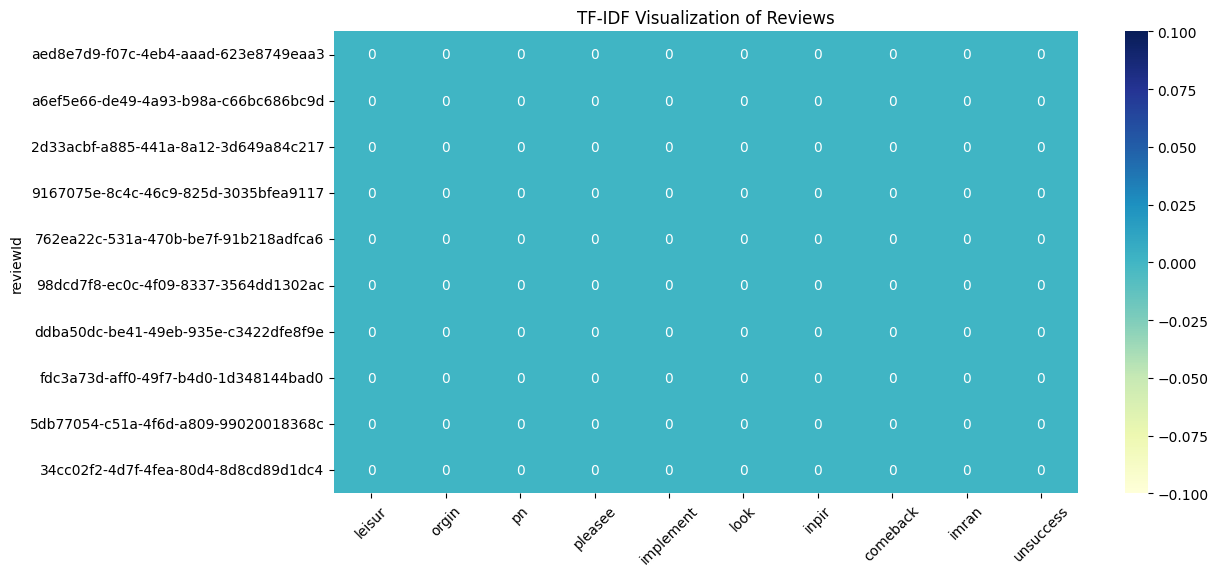

In [15]:
plt.figure(figsize=(12, 6))
sns.heatmap(tfidf_df.iloc[:10, :10], cmap="YlGnBu", annot=True)
plt.xticks(rotation=45)
plt.title("TF-IDF Visualization of Reviews")
plt.show()